# COVID-19 Coronavirus

Coronavirus disease 2019 (COVID-19) is a contagious disease caused by a virus, the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first known case was identified in Wuhan, China, in December 2019.The disease spread worldwide, leading to the COVID-19 pandemic.

Symptoms of COVID‑19 are variable, but often include fever, cough, headache, fatigue, breathing difficulties, loss of smell, and loss of taste. Symptoms may begin one to fourteen days after exposure to the virus. At least a third of people who are infected do not develop noticeable symptoms. Of those people who develop symptoms noticeable enough to be classed as patients, most (81%) develop mild to moderate symptoms (up to mild pneumonia), while 14% develop severe symptoms (dyspnea, hypoxia, or more than 50% lung involvement on imaging), and 5% suffer critical symptoms (respiratory failure, shock, or multiorgan dysfunction). Older people are at a higher risk of developing severe symptoms. Some people continue to experience a range of effects (long COVID) for months after recovery, and damage to organs has been observed. Multi-year studies are underway to further investigate the long-term effects of the disease.

![image](https://github.com/rhythmbhavsar/Corona_Analysis/blob/master/corona.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 

In [2]:
%matplotlib inline
sns.set(rc={'figure.figsize':(10,6)})

## Reading Dataset

In [3]:
corona =  pd.read_csv("COVID-19 Coronavirus.csv")

In [4]:
corona

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438
...,...,...,...,...,...,...,...,...,...,...
220,Wallis and Futuna,Wallis and Futuna Islands,WLF,10894,Oceania,454,7,41674,643,1.541850
221,Western Sahara,Western Sahara,ESHÂ,623031,Africa,10,1,16,2,10.000000
222,Yemen,Yemen,YEM,30975258,Asia,11806,2143,381,69,18.151787
223,Zambia,Zambia,ZMB,19284482,Africa,317076,3967,16442,206,1.251120


In [5]:
corona.shape

(225, 10)

This data set contains **255 rows** and the **10 columns**

## Analying Null values

In [6]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


<AxesSubplot:>

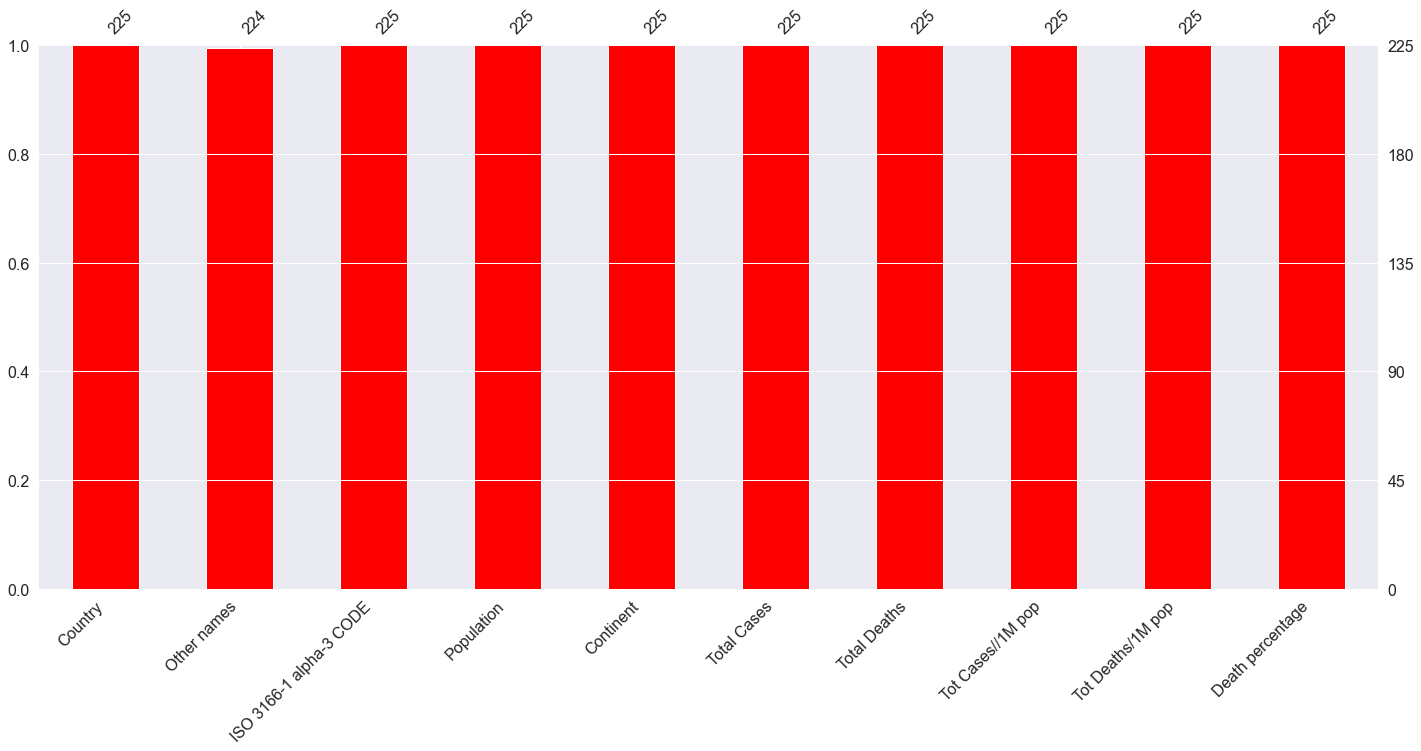

In [7]:
msno.bar(corona, color ='Red')

Here we can analys that **Other name** column have one null value in it.

Other name is the other name of the country. As we had analysed Other name is given as same the country name. Therefore, We will replace the **Nan**  value present in other name column with the name of the country of that particuler column.

For that we need to find out the which country's other name is missing/Null.

In [8]:
c1 = corona.isnull().any(axis=1)
c1 = corona[c1]
c1

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
135,Montenegro,NaN,MNE,628205,Europe,233326,2705,371417,4306,1.159322


So, the above given column have the Nan value. Here we can see its **Country** name is **Montenegro**.

Therefore, we will replace the value of Nan with **Montenegro**.

In [9]:
corona['Other names'].fillna('Montenegro', inplace=True)

In [10]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              225 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


<AxesSubplot:>

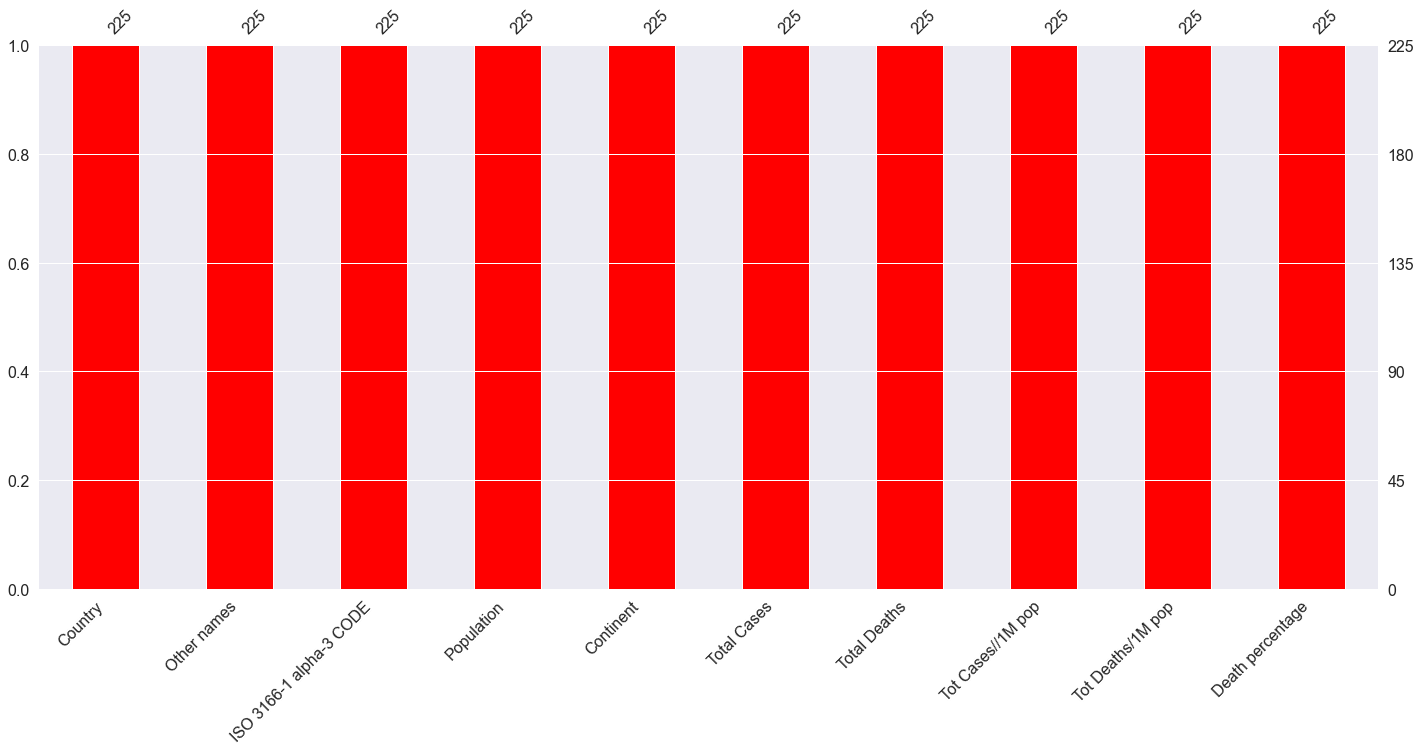

In [11]:
msno.bar(corona, color ='Red')

Here we can say that there are no **Missing/Null** values are presented in our dataset. 


## Statastical Analysis.

In [12]:
corona.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


Here we can see the **Mathemetical Analysis** for the numerical columns.

In [13]:
corona.describe(include = 'object')

,Country,Other names,ISO 3166-1 alpha-3 CODE,Continent
count,225,225,225,225
unique,225,225,225,6
top,Afghanistan,Afghanistan,AFG,Africa
freq,1,1,1,58


In [14]:
corona.columns

Index(['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE', 'Population',
       'Continent', 'Total Cases', 'Total Deaths', 'Tot Cases//1M pop',
       'Tot Deaths/1M pop', 'Death percentage'],
      dtype='object')

## Univariate Analysis

#### What is Univariate Analysis?

- Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression ) and it’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.

Let's do the Univeriate Analysis wtih the Data Visualization.

-  **Distribution of the numeric columns.**

In [15]:
numeric = ['Population', 'Total Cases', 'Total Deaths','Death percentage']

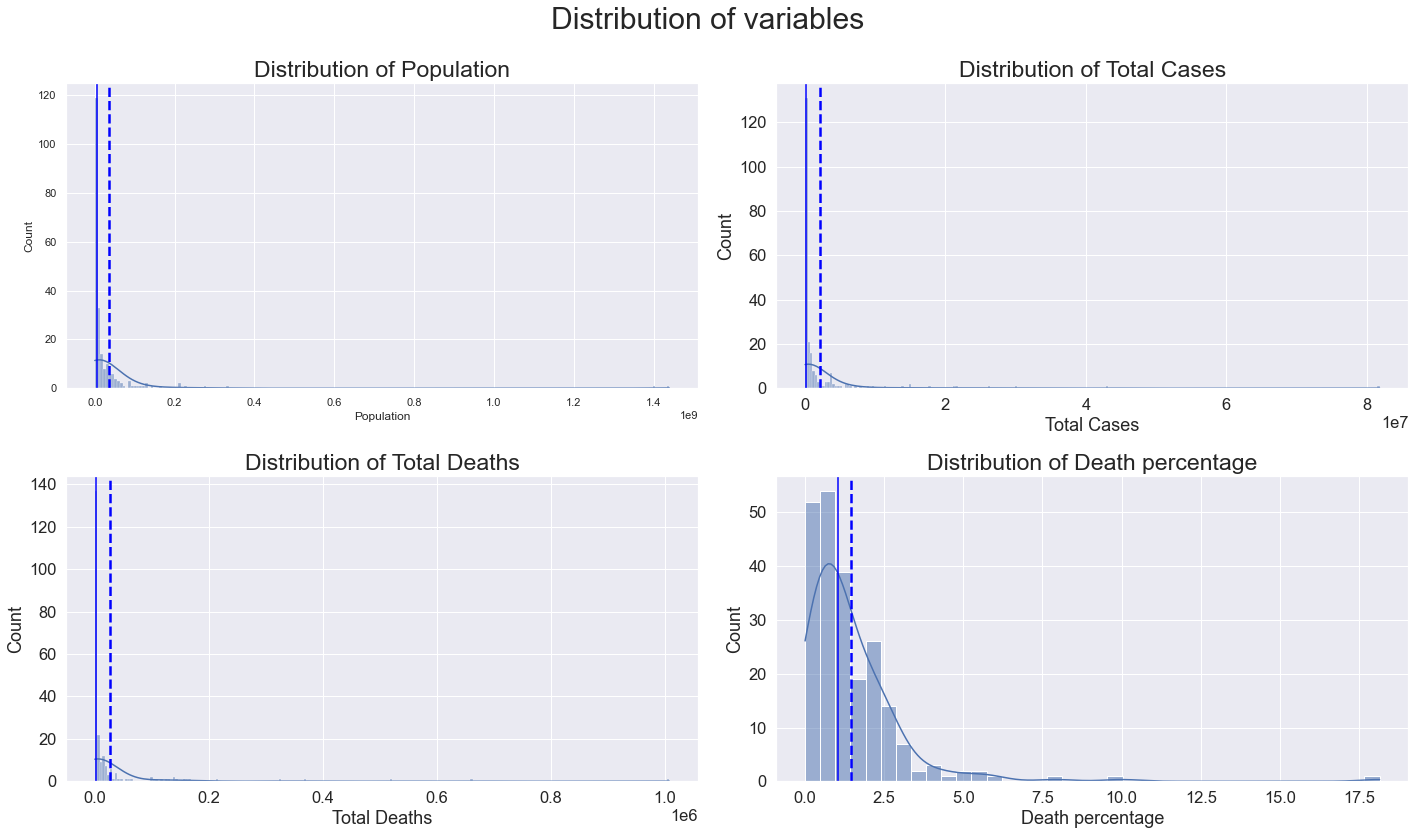

In [16]:
n=1
plt.subplots(figsize=(20, 16))
for i in numeric:
    plt.subplot(3,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.histplot(corona[i],kde=True, palette='Set3')    
    ax.set_title('Distribution of %s'%(i), fontsize=23)
    plt.axvline(x=corona[i].mean(),ls='--',lw=2.5, color='blue',label='mean')
    plt.axvline(x=corona[i].median(), color='blue',label='medain')
    n+=1 
    plt.tight_layout()
plt.suptitle('Distribution of variables', y=1.03, fontsize=30)
plt.show()


Here we can analys that all the data are not Normally distributed. But according to the analysis the skewness of the data in all the features make sense, because different different population in all the countries and also the different atmopsphere in all the countries, its not necessary to have the number of cases and the number of the deaths to be symetric.

-  **Analysing outliers of the numeric columns.**

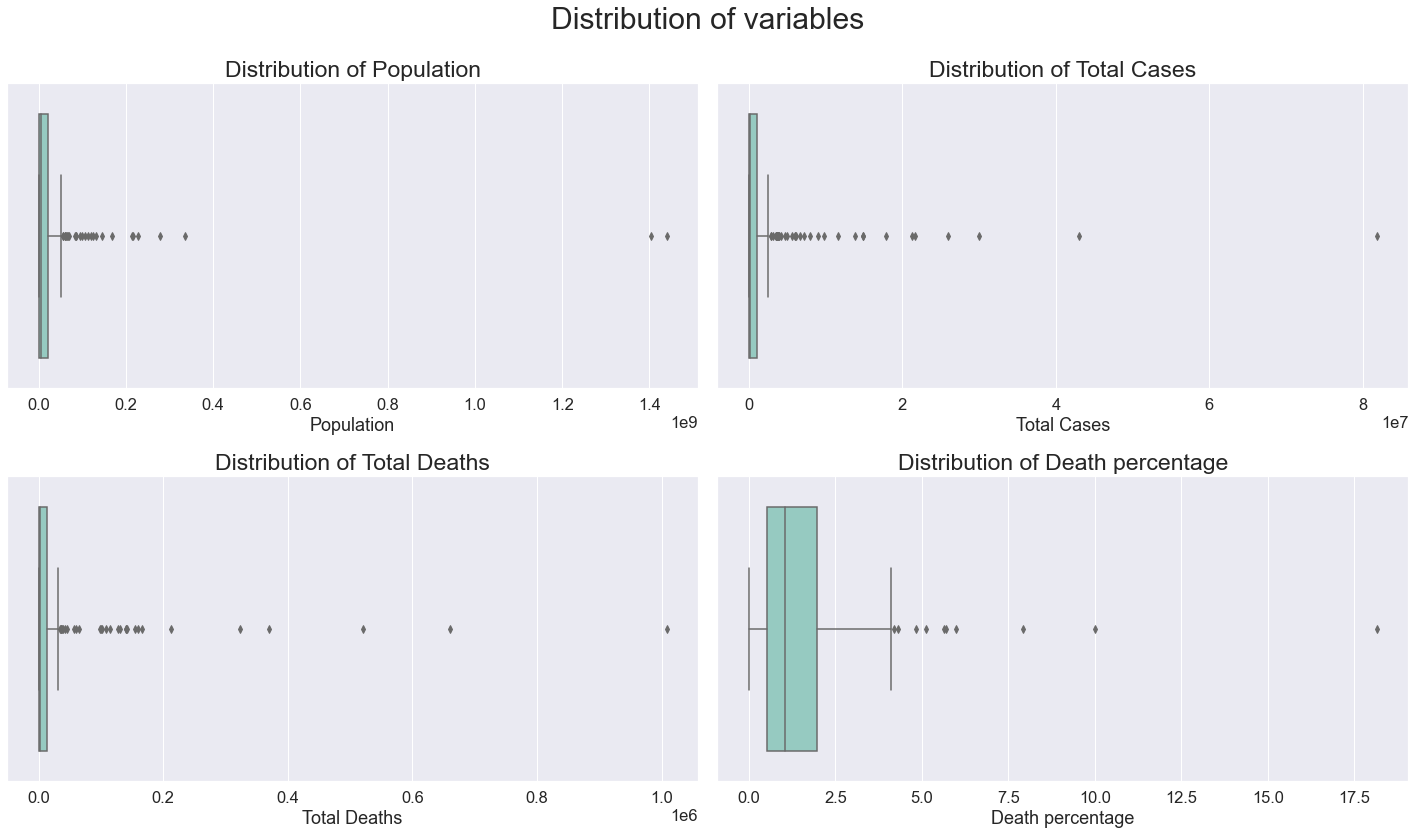

In [17]:
n=1
plt.subplots(figsize=(20, 16))
for i in numeric:
    plt.subplot(3,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.boxplot(x=corona[i],palette='Set3')    
    ax.set_title('Distribution of %s'%(i), fontsize=23)
    n+=1 
    plt.tight_layout()
plt.suptitle('Distribution of variables', y=1.03, fontsize=30)
plt.show()


Here also we can observed that there are many outliers present in all the features because the skewness of the feature.

-  **Analysing categorical columns.**

Here we are analysing the counts for each of the continents.


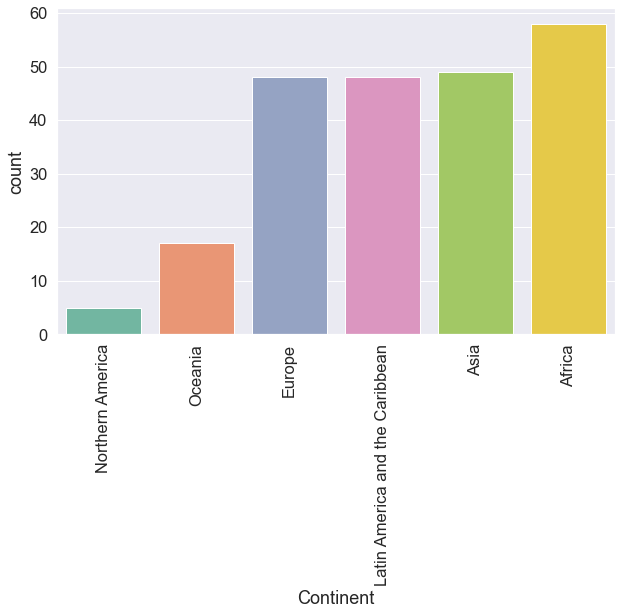

In [18]:
sns.countplot(x='Continent', data=corona, palette='Set2',order=corona['Continent'].value_counts().sort_values().index)
plt.xticks(rotation=90)
plt.show()

**Africa** Continent have the maximum count. And the **Northen America** have the minimum count. 

## Bivariate Analysis

#### What is Bivariate Analysis?

- Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them.

In [19]:
corona.Continent.nunique()

6

### -  Finding the Highest number of the cases among all the countries

In [20]:
cases = corona.sort_values(by=['Total Cases'])
high_cases = cases.tail(10)

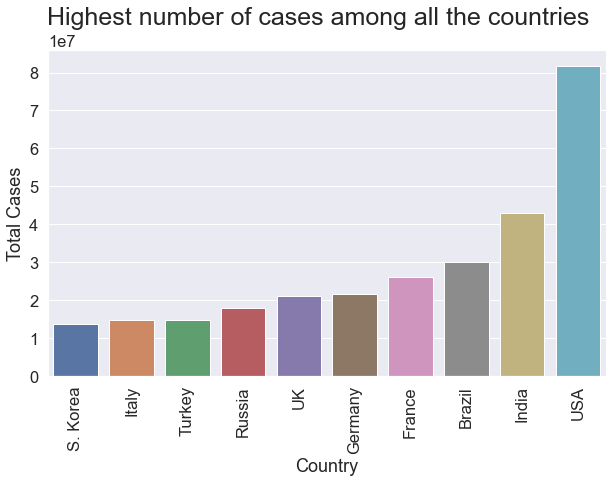

In [21]:
sns.barplot(y='Total Cases', x='Country', data=high_cases)
plt.xticks(rotation=90)
plt.suptitle("Highest number of cases among all the countries", fontsize=25)
plt.show()

**USA** has the maximum cases amoung all the countries.

### - Finding the Lowest number of the cases among all the countries

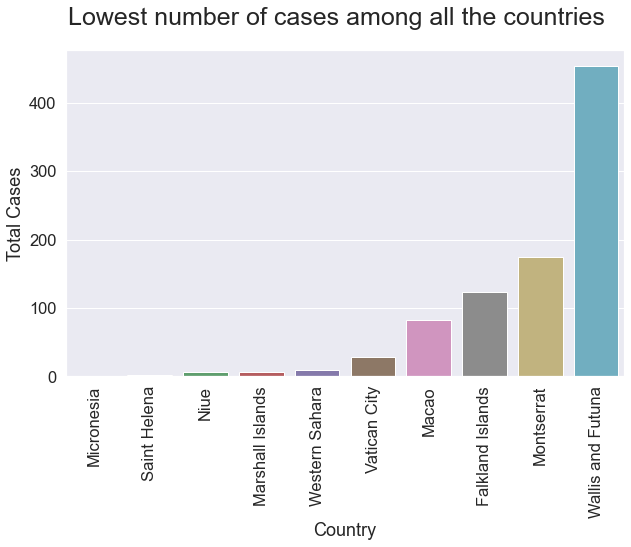

In [22]:
low_cases = cases.head(10)
sns.barplot(y='Total Cases', x='Country', data=low_cases)
plt.xticks(rotation=90)
plt.suptitle("Lowest number of cases among all the countries", fontsize=25)
plt.show()

**Micronesia** and **Saint Helena** has the minimum cases amoung all the countries.

### -
Finding the Highest number of the deaths among all the countries

In [23]:
deaths = corona.sort_values(by=['Total Deaths'])
high_deaths = deaths.tail(10)

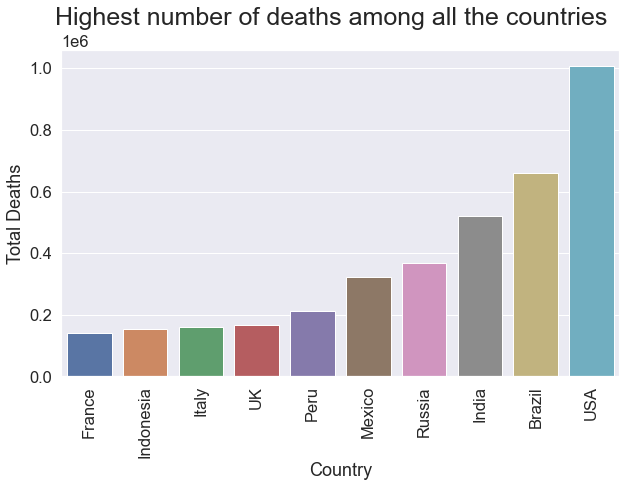

In [24]:
sns.barplot(y='Total Deaths', x='Country', data=high_deaths)
plt.xticks(rotation=90)
plt.suptitle("Highest number of deaths among all the countries", fontsize=25)
plt.show()

**USA** has the maximum deaths amoung all the countries.

### - Finding the Lowest number of the deaths among all the countries

In [25]:
low_deaths = deaths.loc[deaths['Total Deaths'] > 0]

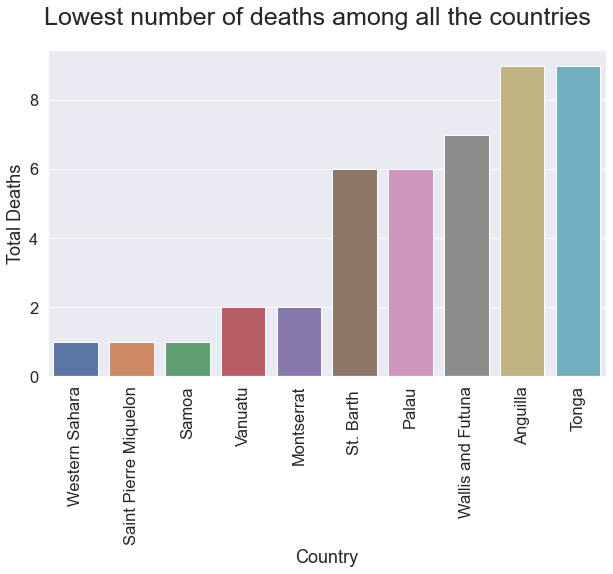

In [26]:
low_deaths = low_deaths.head(10)
sns.barplot(y='Total Deaths', x='Country', data=low_deaths)
plt.xticks(rotation=90)
plt.suptitle("Lowest number of deaths among all the countries", fontsize=25)
plt.show()

**Western Sahara, Saint Pierre Miquelon** and **Samoa** has the minimum deaths amoung all the countries.

### - Finding the countries with the ZERO Deaths

In [27]:
zero_deaths = deaths.loc[deaths['Total Deaths'] == 0]

In [28]:
zero_deaths

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
168,Saint Helena,Saint Helena,SHN,6109,Africa,2,0,327,0,0.0
118,Macao,"China, Macao Special Administrative Region",MAC,664828,Asia,82,0,123,0,0.0
217,Vatican City,Holy See,VAT,805,Europe,29,0,36025,0,0.0
131,Micronesia,Micronesia (Federated States of),FSM,117134,Oceania,1,0,9,0,0.0
67,Falkland Islands,Falkland Islands (Malvinas),FLK,3657,Latin America and the Caribbean,123,0,33634,0,0.0
46,Cook Islands,Cook Islands,COK,17592,Oceania,2118,0,120396,0,0.0
125,Marshall Islands,Marshall Islands,MHL,59889,Oceania,7,0,117,0,0.0
148,Niue,Niue,NIU,1645,Oceania,7,0,4255,0,0.0


The above given are the countries with the **Zero** Deaths.

In [29]:
cont_clms = ['Continent', 'Total Cases','Total Deaths']
continent = corona[cont_clms]
continent = continent.groupby(['Continent']).agg({'Total Cases': 'sum', 'Total Deaths': 'sum'})
continent

,Total Cases,Total Deaths
Continent,,
Africa,11764207,252873
Asia,140957179,1405003
Europe,180332483,1775727
Latin America and the Caribbean,67509231,1686828
Northern America,85364770,1046062
Oceania,5647957,9336


### - Analysing the ratio of Total cases among the continents.

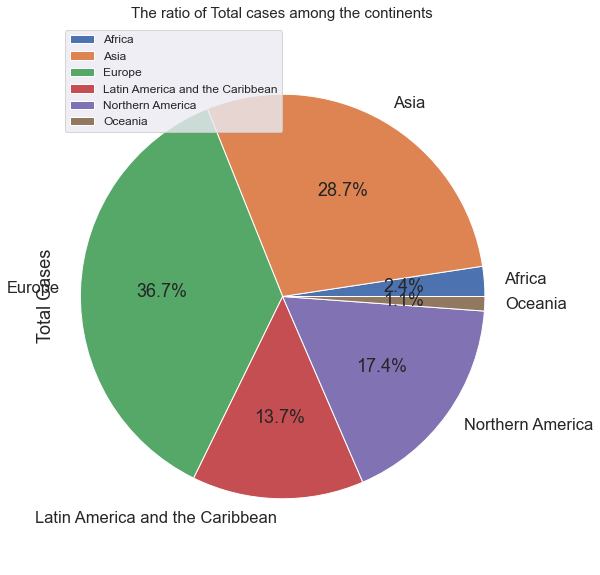

In [30]:
plot = continent.plot.pie(y='Total Cases', figsize=(8, 10),autopct='%1.1f%%')
plt.legend(loc='upper left',fontsize=12)
plt.title('The ratio of Total cases among the continents', size='15')
plt.axis('equal')
plt.show()

-  The bolow given are the **Case** ratio for all the continents.


| Continents  | Cases Ratio (%)  |
|---|---|
| Asia  | 28.7%  |
| Europe  | 36.7%  |
| Africa  | 2.4%  |
| Latin America and the Caribbean  | 13.7%  |
|  Oceania | 1.1%  |
|  Northern America | 17.4%  |



### - Analysing the ratio of Total deaths among the continents.

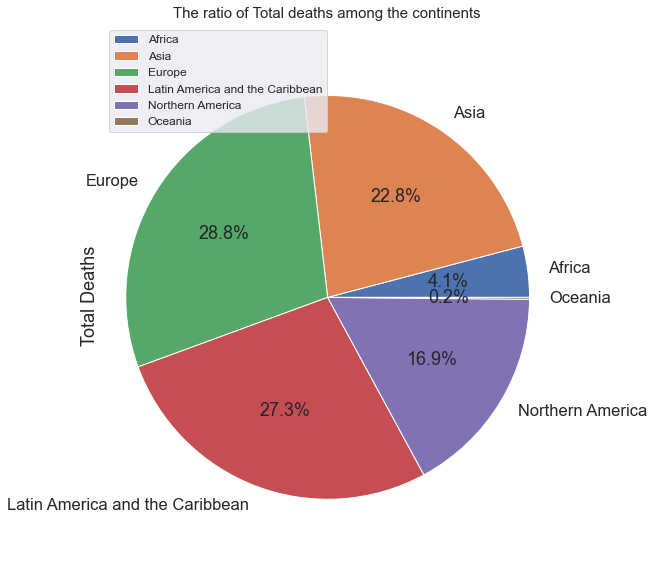

In [31]:
plot = continent.plot.pie(y='Total Deaths', figsize=(8, 10),autopct='%1.1f%%')
plt.legend(loc='upper left',fontsize=12)
plt.title('The ratio of Total deaths among the continents', size='15')
plt.axis('equal')
plt.show()


-  The bolow given are the **Death** ratio for all the continents.


| Continents  | Death Ratio (%)  |
|---|---|
| Asia  | 22.8%  |
| Europe  | 28.8%  |
| Africa  | 4.1%  |
| Latin America and the Caribbean  | 27.3%  |
|  Oceania | 0.2%  |
|  Northern America | 16.9%  |

### - Relation Analysis between Total Cases and Total Deaths

<AxesSubplot:xlabel='Total Deaths', ylabel='Total Cases'>

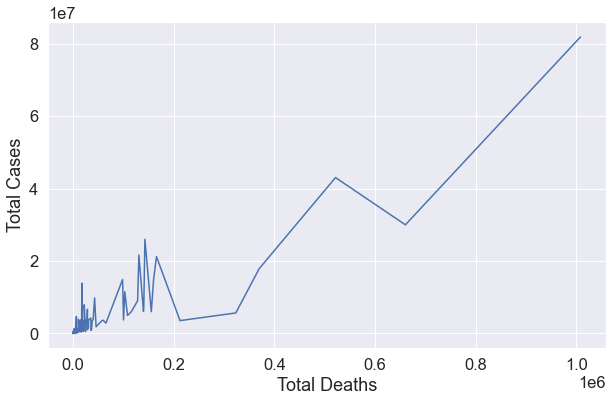

In [32]:
sns.lineplot(x='Total Deaths',y='Total Cases', data=corona)

Here this trend line shows that as the Total cases increses Total Deaths are also increases. 

## Multivariate Analysis

-  Multivariate analysis is conceptualized by tradition as the statistical study of experiments in which multiple measurements are made on each experimental unit and for which the relationship among multivariate measurements and their structure are important to the experiment's understanding.

### - Relationship between Death and Cases among all the continents.

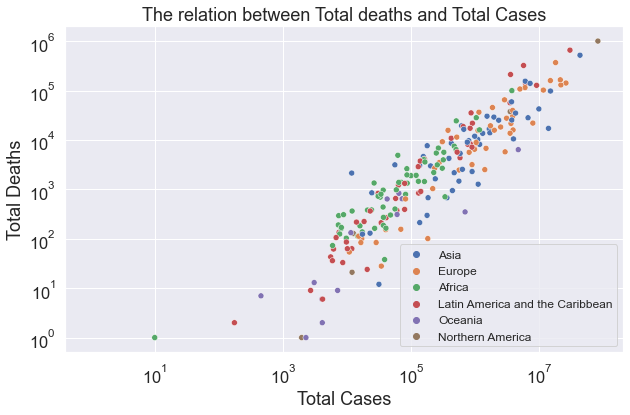

In [51]:
sns.scatterplot(y='Total Deaths', x='Total Cases', data=corona, hue='Continent')
plt.legend(loc='lower right',fontsize=12)
plt.title('The relation between Total deaths and Total Cases', size='18')
plt.xscale('log')
plt.yscale('log')
plt.show()

Here we can see that the Total cases and the Total Deaths have the strong realtion with each other.

### - Relationship between Population and Cases among all the continents.

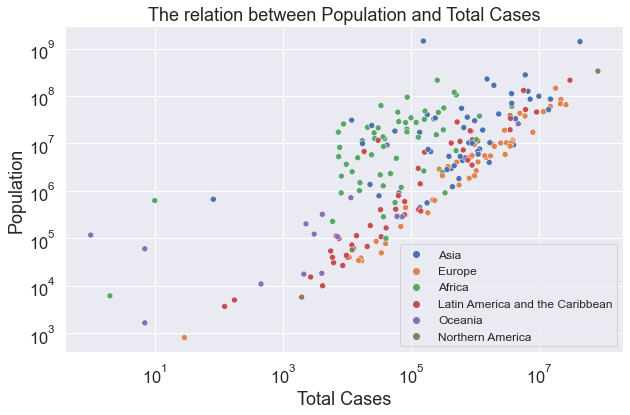

In [50]:
sns.scatterplot(y='Population', x='Total Cases', data=corona, hue='Continent')
plt.legend(loc='lower right',fontsize=12)
plt.title('The relation between Population and Total Cases', size='18')
plt.xscale('log')
plt.yscale('log')
plt.show()

Here we can see that the Total cases and the Population does not have the strong realtion with each other.

### - Relationship between Death and Population among all the continents.

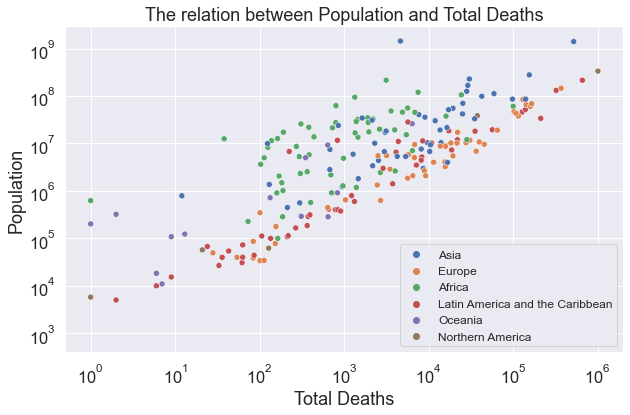

In [52]:
sns.scatterplot(y='Population', x='Total Deaths', data=corona, hue='Continent')
plt.legend(loc='lower right',fontsize=12)
plt.title('The relation between Population and Total Deaths', size='18')
plt.xscale('log')
plt.yscale('log')
plt.show()

Here we can see that the Population and the Total Deaths doest not have the strong realtion with each other.

## Corelation of the features with eachother.

- **What is correlation analysis?**

     Correlation analysis in research is a statistical method used to measure the strength of the linear relationship between two variables and compute their association. Simply put - correlation analysis calculates the level of change in one variable due to the change in the other.

<AxesSubplot:>

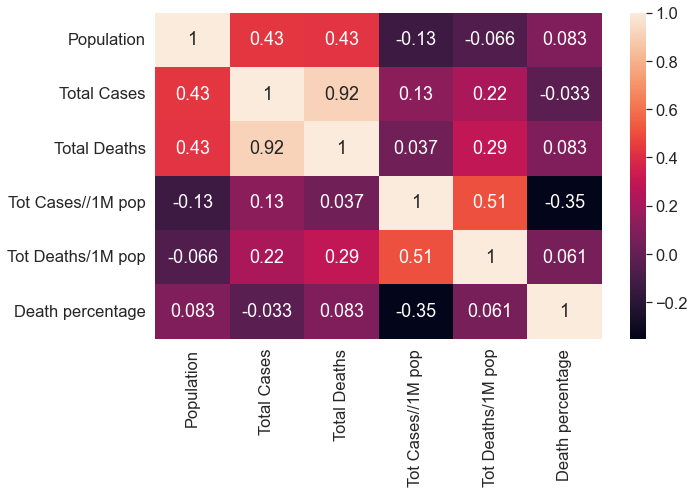

In [34]:
sns.heatmap(corona.corr(), annot=True)

## Analysing all the Features wirth each other

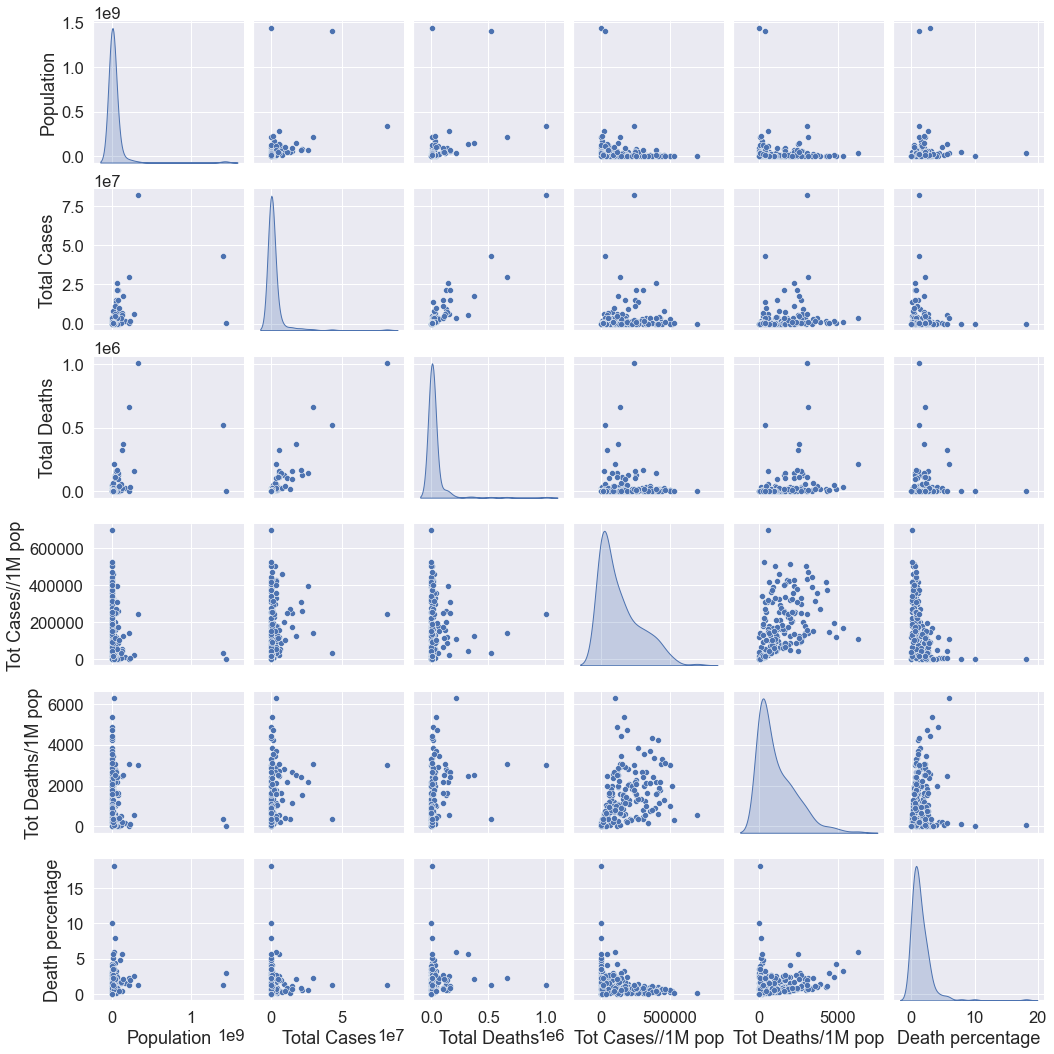

In [55]:
sns.pairplot(corona,diag_kind='kde')

![image](https://github.com/rhythmbhavsar/Corona_Analysis/blob/master/corona.png)